ABRIR ARQUIVO TSP

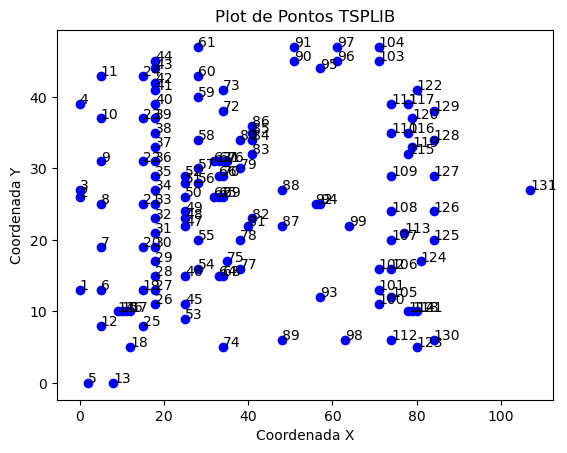

In [6]:
# Importa a biblioteca matplotlib para criar gráficos
import matplotlib.pyplot as plt

# Define uma função para ler um arquivo TSPLIB e extrair os pontos
def ler_arquivo_tsplib(nome_arquivo):
    # Inicializa uma lista vazia para armazenar os pontos
    pontos = []

    # Abre o arquivo especificado em modo de leitura
    with open(nome_arquivo, "r") as arquivo:
        # Inicializa uma variável para controlar se estamos lendo a seção de pontos
        lendo_pontos = False

        # Itera pelas linhas do arquivo
        for linha in arquivo:
            # Verifica se estamos na seção que contém as coordenadas dos pontos
            if "NODE_COORD_SECTION" in linha:
                lendo_pontos = True
                continue
            # Verifica se chegamos ao final da seção de coordenadas
            elif "EOF" in linha:
                break
            # Se estivermos na seção de coordenadas, extrai as coordenadas dos pontos
            if lendo_pontos:
                partes = linha.strip().split()
                # Verifica se a linha tem o formato correto (número, coordenada x, coordenada y)
                if len(partes) == 3:
                    _, x, y = partes
                    pontos.append((float(x), float(y)))
    
    # Retorna a lista de pontos extraídos do arquivo
    return pontos

# Define o nome do arquivo TSPLIB a ser lido (substitua pelo nome do seu arquivo)
nome_arquivo = "base.tsp"

# Chama a função para ler os pontos do arquivo e armazená-los na variável "pontos"
pontos = ler_arquivo_tsplib(nome_arquivo)

# Extrai as coordenadas x e y dos pontos
x = [ponto[0] for ponto in pontos]
y = [ponto[1] for ponto in pontos]

# Cria um gráfico de dispersão (scatter plot) para exibir os pontos
plt.scatter(x, y, marker='o', color='blue')

# Define rótulos para os pontos (opcional) - Exibe números nos pontos
for i, ponto in enumerate(pontos):
    plt.annotate(str(i + 1), (x[i], y[i]))

# Define título e rótulos dos eixos (opcional)
plt.title('Plot de Pontos TSPLIB')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Mostra o gráfico na tela
plt.show()

INICIAR ALGORITMO

In [7]:
import random

# Função para ler um arquivo TSP e extrair as coordenadas das cidades
def ler_arquivo_tsp(nome_arquivo):
    cidades = []
    with open(nome_arquivo, 'r') as arquivo:
        lendo_coord = False
        for linha in arquivo:
            linha = linha.strip()
            if linha.startswith("NODE_COORD_SECTION"):
                lendo_coord = True
            elif linha.startswith("EOF"):
                break
            elif lendo_coord:
                partes = linha.split()
                cidade_id = int(partes[0])
                x = float(partes[1])
                y = float(partes[2])
                cidades.append((cidade_id, x, y))
    return cidades

# Função para criar a população inicial com cromossomos aleatórios
def criar_populacao_inicial(cidades, tamanho_populacao):
    # Inicializa uma lista vazia para a população
    populacao = []

    # Exclui a cidade de origem, pois será fixa no início de cada cromossomo
    cidades_sem_origem = cidades[1:]

    # Gera cromossomos aleatórios para compor a população
    for _ in range(tamanho_populacao):
        # Gera uma permutação aleatória das cidades (sem a cidade de origem)
        cromossomo = random.sample(cidades_sem_origem, len(cidades_sem_origem))
        
        # Adiciona a cidade de origem no início de cada cromossomo para completar o ciclo
        cromossomo.insert(0, cidades[0])
        
        # Adiciona o cromossomo à população
        populacao.append(cromossomo)
    
    return populacao

# Nome do arquivo TSP a ser lido (substitua pelo nome do seu arquivo)
nome_do_arquivo_tsp = "base.tsp"

# Chama a função para ler as coordenadas das cidades a partir do arquivo TSP
cidades = ler_arquivo_tsp(nome_do_arquivo_tsp)

# Define o tamanho da população inicial
tamanho_populacao = 50

# Cria a população inicial chamando a função criar_populacao_inicial
populacao_inicial = criar_populacao_inicial(cidades, tamanho_populacao)

# Imprime a população inicial (cromossomos gerados aleatoriamente)
print(populacao_inicial)

[[(1, 0.0, 13.0), (131, 107.0, 27.0), (103, 71.0, 45.0), (96, 61.0, 45.0), (130, 84.0, 6.0), (52, 25.0, 29.0), (93, 57.0, 12.0), (95, 57.0, 44.0), (123, 80.0, 5.0), (73, 34.0, 41.0), (85, 41.0, 35.0), (122, 80.0, 41.0), (40, 18.0, 39.0), (116, 78.0, 35.0), (15, 10.0, 10.0), (104, 71.0, 47.0), (114, 78.0, 10.0), (53, 25.0, 9.0), (129, 84.0, 38.0), (115, 78.0, 32.0), (60, 28.0, 43.0), (21, 15.0, 25.0), (125, 84.0, 20.0), (16, 11.0, 10.0), (119, 79.0, 33.0), (70, 34.0, 29.0), (126, 84.0, 24.0), (79, 38.0, 30.0), (107, 74.0, 20.0), (92, 56.0, 25.0), (74, 34.0, 5.0), (127, 84.0, 29.0), (38, 18.0, 35.0), (64, 33.0, 15.0), (7, 5.0, 19.0), (17, 12.0, 10.0), (76, 35.0, 31.0), (4, 0.0, 39.0), (51, 25.0, 28.0), (124, 81.0, 17.0), (18, 12.0, 5.0), (82, 41.0, 23.0), (66, 33.0, 29.0), (30, 18.0, 19.0), (24, 15.0, 43.0), (2, 0.0, 26.0), (46, 25.0, 15.0), (58, 28.0, 34.0), (10, 5.0, 37.0), (112, 74.0, 6.0), (57, 28.0, 30.0), (13, 8.0, 0.0), (81, 40.0, 22.0), (128, 84.0, 34.0), (25, 15.0, 8.0), (28, 18

CALCULAR FITNESS (A função calcular_aptidão é uma parte fundamental de algoritmos genéticos, pois é responsável por avaliar o quão boa é uma solução (cromossomo) em relação ao problema. Ela faz isso atribuindo um valor de aptidão (fitness) a cada solução com base em quão boa é essa solução de acordo com os critérios do problema. A aptidão é uma medida de quão próxima uma solução está de ser a melhor solução possível.

Neste código, as funções calcular_distancia_total e calcular_distancia_entre_cidades são usadas para calcular a distância total de uma rota (cromossomo). A distância total é usada como critério de aptidão, onde soluções com distâncias menores são consideradas mais aptas.). 

 A função calcular_aptidao calcula a distância total da rota, que é usada como valor de aptidão. Essa aptidão é usada para selecionar os cromossomos mais aptos no algoritmo genético, ajudando-o a convergir para soluções melhores.

In [10]:
# Função para calcular a distância total percorrida em uma rota (cromossomo)
def calcular_distancia_total(rota):
    distancia_total = 0.0
    for i in range(len(rota) - 1):
        cidade_atual = rota[i]
        proxima_cidade = rota[i + 1]
        # Calcula a distância entre as cidades adjacentes na rota
        distancia = calcular_distancia_entre_cidades(cidade_atual, proxima_cidade)
        distancia_total += distancia
    # Adiciona a distância de volta à cidade de origem para fechar o ciclo
    distancia_total += calcular_distancia_entre_cidades(rota[-1], rota[0])
    return distancia_total

# Função para calcular a distância entre duas cidades usando a fórmula da distância euclidiana
def calcular_distancia_entre_cidades(cidade1, cidade2):
    x1, y1 = cidade1[1], cidade1[2]
    x2, y2 = cidade2[1], cidade2[2]
    # Utiliza a fórmula da distância euclidiana para calcular a distância
    distancia = ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
    return distancia

# Função para calcular a aptidão de um cromossomo (rota)
def calcular_aptidao(cromossomo):
    # Calcula a distância total da rota
    distancia_total = calcular_distancia_total(cromossomo)
    return distancia_total

# Exemplo de uso:
for cromossomo in populacao_inicial:
    # Calcula a aptidão (distância total) de cada cromossomo
    aptidao = calcular_aptidao(cromossomo)
    print("Aptidão da rota: {:.2f}".format(aptidao))

Aptidão da rota: 4951.86
Aptidão da rota: 4763.77
Aptidão da rota: 4599.97
Aptidão da rota: 5049.10
Aptidão da rota: 4682.97
Aptidão da rota: 4177.82
Aptidão da rota: 4761.22
Aptidão da rota: 4702.49
Aptidão da rota: 4512.31
Aptidão da rota: 4553.84
Aptidão da rota: 4452.25
Aptidão da rota: 4546.17
Aptidão da rota: 4584.48
Aptidão da rota: 4231.10
Aptidão da rota: 4758.16
Aptidão da rota: 4718.29
Aptidão da rota: 4318.58
Aptidão da rota: 5049.41
Aptidão da rota: 4735.69
Aptidão da rota: 5013.25
Aptidão da rota: 4765.84
Aptidão da rota: 4576.78
Aptidão da rota: 4677.00
Aptidão da rota: 4786.94
Aptidão da rota: 4946.94
Aptidão da rota: 4761.76
Aptidão da rota: 4632.49
Aptidão da rota: 4707.08
Aptidão da rota: 4458.18
Aptidão da rota: 4280.06
Aptidão da rota: 4880.05
Aptidão da rota: 4870.64
Aptidão da rota: 4929.76
Aptidão da rota: 4331.65
Aptidão da rota: 4350.27
Aptidão da rota: 4258.80
Aptidão da rota: 4832.91
Aptidão da rota: 4581.91
Aptidão da rota: 4762.76
Aptidão da rota: 4321.95


SELEÇÃO (A etapa de seleção em um algoritmo genético é responsável por escolher quais cromossomos (soluções) serão os pais da próxima geração. A seleção é realizada com base na aptidão de cada cromossomo, onde cromossomos mais aptos têm uma maior probabilidade de serem selecionados. A seleção é fundamental para direcionar a evolução da população em direção a soluções melhores.O algoritmo genético usa o torneio de seleção para escolher pais com base em sua aptidão e, em seguida, aplica o crossover ordenado e a mutação para criar a próxima geração de cromossomos. O código mantém o elitismo, preservando o melhor cromossomo da geração atual.)

Geração: 1, Melhor custo atual: 3822.14
Geração: 2, Melhor custo atual: 3673.52
Geração: 3, Melhor custo atual: 3569.78
Geração: 4, Melhor custo atual: 3457.70
Geração: 5, Melhor custo atual: 3202.75
Geração: 6, Melhor custo atual: 3094.26
Geração: 7, Melhor custo atual: 3002.87
Geração: 8, Melhor custo atual: 2942.88
Geração: 9, Melhor custo atual: 2841.43
Geração: 10, Melhor custo atual: 2752.90
Geração: 11, Melhor custo atual: 2695.68
Geração: 12, Melhor custo atual: 2621.59
Geração: 13, Melhor custo atual: 2578.85
Geração: 14, Melhor custo atual: 2538.33
Geração: 15, Melhor custo atual: 2465.28
Geração: 16, Melhor custo atual: 2422.72
Geração: 17, Melhor custo atual: 2415.50
Geração: 18, Melhor custo atual: 2368.92
Geração: 19, Melhor custo atual: 2336.11
Geração: 20, Melhor custo atual: 2295.77
Geração: 21, Melhor custo atual: 2263.56
Geração: 22, Melhor custo atual: 2235.72
Geração: 23, Melhor custo atual: 2219.36
Geração: 24, Melhor custo atual: 2205.20
Geração: 25, Melhor custo

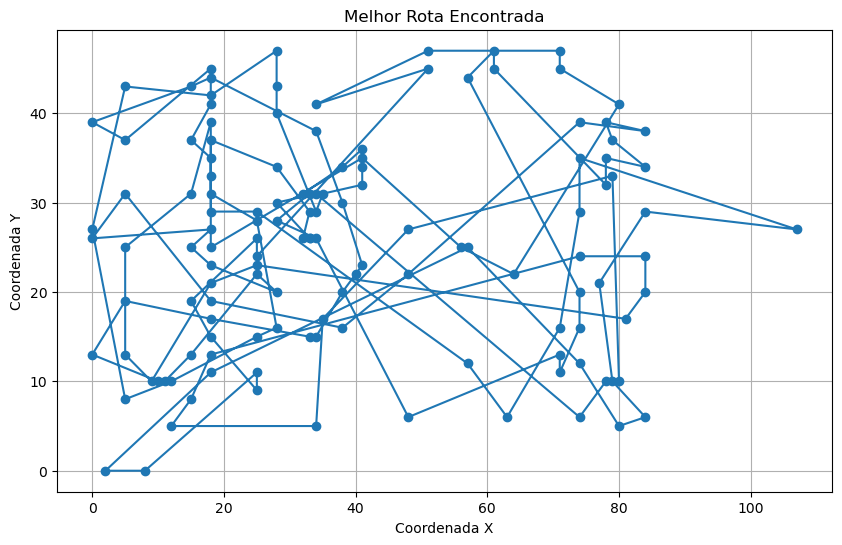

In [9]:
import random
import math
import matplotlib.pyplot as plt

# Função para realizar o torneio de seleção
def selecao_torneio(populacao, tamanho_torneio):
    torneio = random.sample(populacao, tamanho_torneio)
    vencedor_torneio = min(torneio, key=calcular_aptidao)
    return vencedor_torneio
# Função para realizar o crossover ordenado entre dois pais
def crossover_ordenado(pai1, pai2):
    ponto_corte1, ponto_corte2 = sorted(random.sample(range(len(pai1)), 2))
    filho = [-1] * len(pai1)
    filho[ponto_corte1:ponto_corte2 + 1] = pai1[ponto_corte1:ponto_corte2 + 1]
    restantes_genes = [gene for gene in pai2 if gene not in filho]
    indice_insercao = 0
    for i in range(len(filho)):
        if filho[i] == -1:
            filho[i] = restantes_genes[indice_insercao]
            indice_insercao += 1
    return filho
# Função para realizar a mutação de um cromossomo
def mutacao(cromossomo, taxa_mutacao):
    if random.random() < taxa_mutacao:
        indice1, indice2 = random.sample(range(len(cromossomo)), 2)
        cromossomo[indice1], cromossomo[indice2] = cromossomo[indice2], cromossomo[indice1]
        # Função para criar a próxima geração com elitismo
def criar_proxima_geracao(populacao, tamanho_torneio, taxa_mutacao):
    proxima_geracao = []
    melhor_cromossomo = min(populacao, key=calcular_aptidao)
    proxima_geracao.append(melhor_cromossomo)  # Elitismo: mantém o melhor cromossomo
    while len(proxima_geracao) < len(populacao):
        pai1 = selecao_torneio(populacao, tamanho_torneio)
        pai2 = selecao_torneio(populacao, tamanho_torneio)
        filho = crossover_ordenado(pai1, pai2)
        mutacao(filho, taxa_mutacao)
        proxima_geracao.append(filho)
    return proxima_geracao

# Substitua "exemplo.tsp" pelo nome do seu arquivo .tsp
nome_do_arquivo_tsp = "base.tsp"

# Leitura das coordenadas das cidades do arquivo .tsp
cidades = ler_arquivo_tsp(nome_do_arquivo_tsp)

# Parâmetros do algoritmo genético
tamanho_populacao = 500
tamanho_torneio = 50
taxa_mutacao = 0.05

# Variáveis para controle de critério de parada automático
max_iter_sem_melhoria = 5  # Número máximo de gerações sem melhoria
melhor_custo_atual = float('inf')
iter_sem_melhoria = 0

# Inicialização da população
populacao = criar_populacao_inicial(cidades, tamanho_populacao)

# Execução do algoritmo genético
melhores_rotas = []

while iter_sem_melhoria < max_iter_sem_melhoria:
    populacao = criar_proxima_geracao(populacao, tamanho_torneio, taxa_mutacao)
    melhor_cromossomo = min(populacao, key=calcular_aptidao)
    melhor_custo = calcular_aptidao(melhor_cromossomo)

    if melhor_custo < melhor_custo_atual:
        melhor_custo_atual = melhor_custo
        iter_sem_melhoria = 0
    else:
        iter_sem_melhoria += 1

    melhores_rotas.append(melhor_custo_atual)

    print(f"Geração: {len(melhores_rotas)}, Melhor custo atual: {melhor_custo_atual:.2f}")

# Encontrando a melhor rota no final das gerações
melhor_cromossomo_final = min(populacao, key=calcular_aptidao)
melhor_aptidao_final = calcular_aptidao(melhor_cromossomo_final)

# Imprimir a melhor rota e a aptidão
print("Melhor Rota Encontrada:")
print("Rota:", melhor_cromossomo_final)
print("Aptidão:", melhor_aptidao_final)

# Plotar a melhor rota encontrada
melhor_rota_x, melhor_rota_y = zip(*[(cidade[1], cidade[2]) for cidade in melhor_cromossomo_final])
melhor_rota_x = list(melhor_rota_x) + [melhor_rota_x[0]]
melhor_rota_y = list(melhor_rota_y) + [melhor_rota_y[0]]

plt.figure(figsize=(10, 6))
plt.plot(melhor_rota_x, melhor_rota_y, marker='o', linestyle='-')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Melhor Rota Encontrada')
plt.grid(True)
plt.show()